In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('data/features.csv.zip', index_col='match_id')
train.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


In [2]:
players = ["{}{}_hero".format(c, i) for c in ['r', 'd'] for i in range(1,6)]
train.filter(players, axis=1).head()

,r1_hero,r2_hero,r3_hero,r4_hero,r5_hero,d1_hero,d2_hero,d3_hero,d4_hero,d5_hero
match_id,,,,,,,,,,
0,11,67,29,20,105,4,42,21,37,84
1,42,49,67,37,26,39,88,79,7,12
2,33,98,20,27,4,22,66,86,29,80
3,29,30,75,37,41,96,48,15,102,20
4,13,27,30,72,93,26,69,22,25,8


In [3]:
wins = {}
defeats = {}
for i, match_id in enumerate(train.index):
    for p in range(1,6):
        if train.ix[match_id, 'radiant_win'] == 1:
            wins[train.ix[match_id, 'r{}_hero'.format(p)]] = wins.get(train.ix[match_id, 'r{}_hero'.format(p)], 0) + 1
            defeats[train.ix[match_id, 'd{}_hero'.format(p)]] = defeats.get(train.ix[match_id, 'd{}_hero'.format(p)], 0) + 1
        else:
            wins[train.ix[match_id, 'd{}_hero'.format(p)]] = wins.get(train.ix[match_id, 'd{}_hero'.format(p)], 0) + 1
            defeats[train.ix[match_id, 'r{}_hero'.format(p)]] = defeats.get(train.ix[match_id, 'r{}_hero'.format(p)], 0) + 1

In [4]:
heroes = pd.read_csv('data/dictionaries/heroes.csv', index_col='id')
df_wins = pd.DataFrame(list(wins.values()), columns=['wins'], index=wins.keys())
df_defeats = pd.DataFrame(list(defeats.values()), columns=['defeats'], index=defeats.keys())
df = df_wins.join(df_defeats).join(heroes).drop('name',axis=1)
df.head()

,wins,defeats,localized_name
1,5371,5412,Anti-Mage
2,2487,3558,Axe
3,5239,5695,Bane
4,2611,2556,Bloodseeker
5,3944,3651,Crystal Maiden


In [5]:
df['w-d'] = df['wins'] - df['defeats']
df['all'] = df['wins'] + df['defeats']
df['avg_win'] = df['wins'] / df['all']
df.sort_values(['w-d'], ascending=False).head(10)

,wins,defeats,localized_name,w-d,all,avg_win
11,19766,17184,Shadow Fiend,2582,36950,0.534939
85,12335,10056,Undying,2279,22391,0.550891
71,14042,11989,Spirit Breaker,2053,26031,0.539434
52,4071,2775,Leshrac,1296,6846,0.594654
28,10345,9190,Slardar,1155,19535,0.529562
31,5627,4645,Lich,982,10272,0.547800
69,4619,3694,Doom,925,8313,0.555636
67,4044,3225,Spectre,819,7269,0.556335
72,17617,16845,Gyrocopter,772,34462,0.511201
42,5759,4992,Skeleton King,767,10751,0.535671


In [6]:
df.sort_values(['avg_win'], ascending=False).head(10)

,wins,defeats,localized_name,w-d,all,avg_win
52,4071,2775,Leshrac,1296,6846,0.594654
102,1834,1460,Abaddon,374,3294,0.556770
67,4044,3225,Spectre,819,7269,0.556335
69,4619,3694,Doom,925,8313,0.555636
85,12335,10056,Undying,2279,22391,0.550891
22,4218,3474,Zeus,744,7692,0.548362
6,2173,1792,Drow Ranger,381,3965,0.548045
31,5627,4645,Lich,982,10272,0.547800
92,1316,1117,Visage,199,2433,0.540896
77,635,540,Lycanthrope,95,1175,0.540426


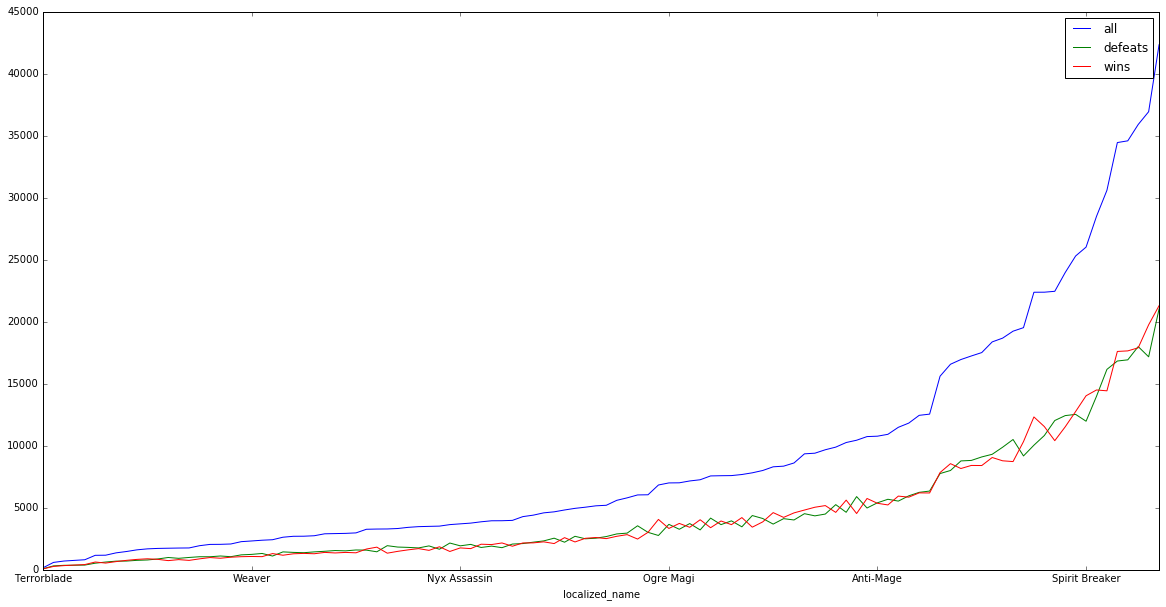

In [42]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
df.sort_values(['all']).filter(['localized_name','all', 'defeats', 'wins']).plot(x='localized_name')

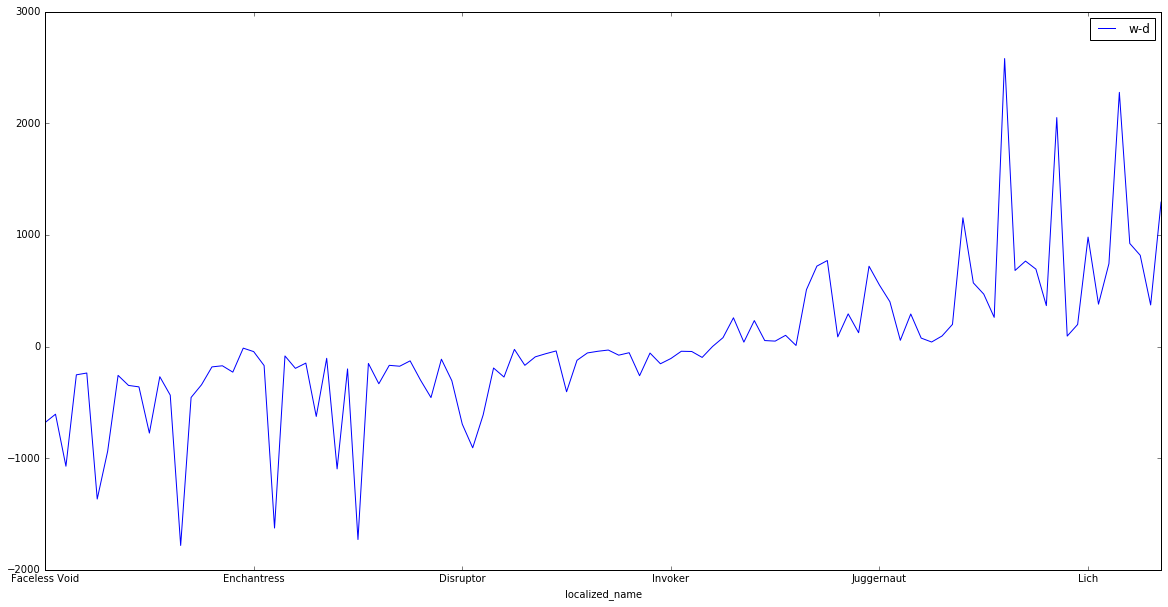

In [46]:
df.sort_values(['avg_win']).filter(['localized_name','w-d']).plot(x='localized_name')

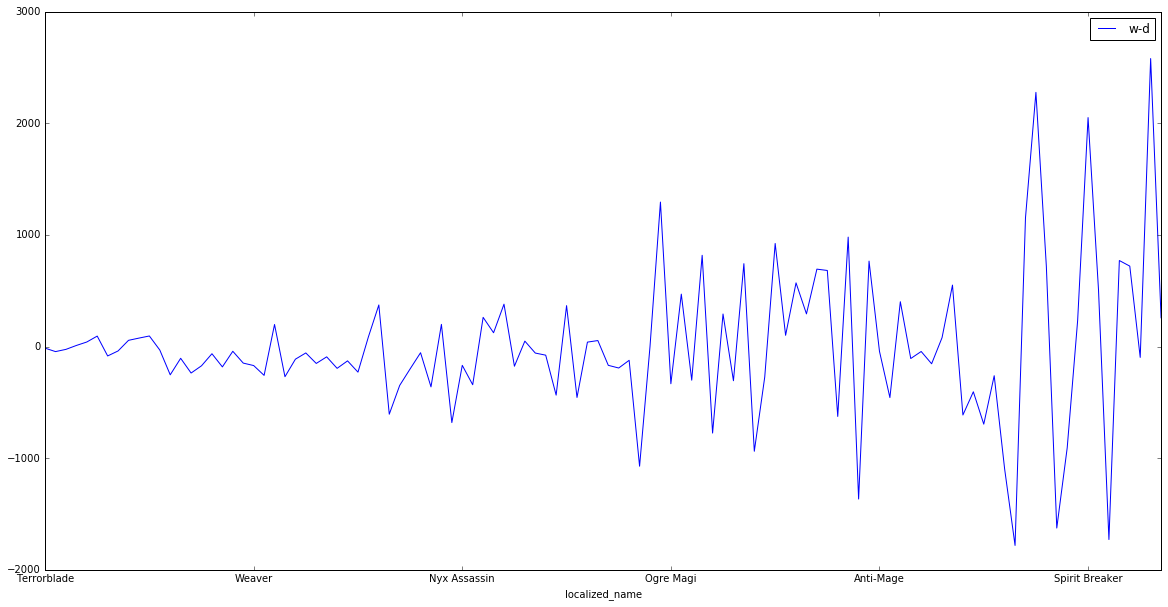

In [44]:
df.sort_values(['all']).filter(['localized_name','w-d']).plot(x='localized_name')